# Building Neural Networks in Keras

## Machine Learning Methods 


### Module 7: Neural Networks 
### Part 2: Building Neural Networks in Keras

### Instructor: Farhad Pourkamali

Video: https://youtu.be/cXTHzXXuZlc

### Gradient-based learning
<hr style="border:2px solid gray">

* Neural networks are usually trained by using iterative, gradient-based optimizers such as (stochastic) gradient descent

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_{t} - \eta_t \nabla J(\boldsymbol{\theta}_{t})$$

* $\boldsymbol{\theta}_{t}$ is the parameter vector at iteration $t$
* $\eta_t$ is the learning rate, determining the step size
* $g_t=\nabla J(\boldsymbol{\theta}_{t})$ is the gradient of the loss function     

### Backprop
<hr style="border:2px solid gray">


* Backpropagation is the core algorithm used for training neural networks through gradient-based optimization.

* It enables the information from the **loss function** (or cost) to flow **backward** through the network—from the output layer to the input layer—in order to compute the gradients of the loss with respect to all **trainable parameters** (weights and biases).

* This is achieved efficiently using the chain rule from calculus, which allows the computation of derivatives for functions composed of many layers or nested functions.

* By recursively applying the chain rule from the output layer to the input layer, we obtain the gradients needed to update the model parameters via an optimization algorithm like gradient descent.

### Backprop and chain rule
<hr style="border:2px solid gray">

* Consider a 3-layer network with one unit in each layer and a scalar input 

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/backprop1.png?raw=true\" width=700>

In [2]:
import tensorflow as tf

# Define the function f(u, v)
def f(u, v):
    return 3 * u + 5 * v

# Define values for x and y
x = tf.constant(2.0)
y = tf.constant(3.0)

# Use tf.GradientTape to compute gradients
with tf.GradientTape(persistent=True) as tape:
    # Watch the variables we want to compute gradients with respect to
    tape.watch(x)
    tape.watch(y)
    
    # Define u and v as functions of x and y
    u = 2 * x
    v = x + y

    # Define f as a function of u and v
    result = f(u, v)

# Compute the gradients
df_dx = tape.gradient(result, x)
df_dy = tape.gradient(result, y)


# Print the gradients
print("df/dx:", df_dx.numpy())
print("df/dy:", df_dy.numpy())


df/dx: 11.0
df/dy: 5.0


### Implementing MLPs with Keras

<hr style="border:2px solid gray">

* Keras is a high-level Deep Learning API to build, train, and evaluate all sorts of neural networks
    * Keras runs on top of TensorFlow 2
    * The best way to learn Keras: https://keras.io/
        * Layers 
        * Models: groups layers into an object with training/inference features 
        * Optimizers
        * Losses
        * Metrics

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.17.0


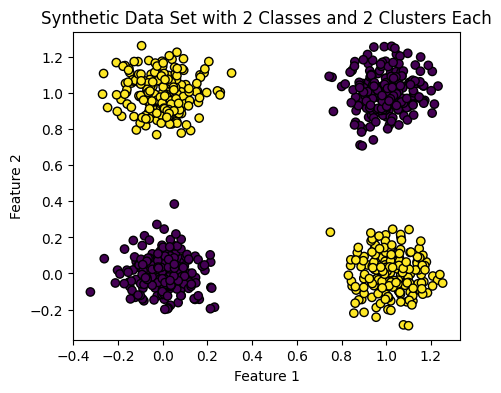

In [4]:
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data set
X, y = make_blobs(n_samples=800, centers=[[0, 0], [0, 1], [1, 0], [1, 1]], cluster_std=.1, random_state=42)

y[y == 0] = 0
y[y == 1] = 1
y[y == 2] = 1
y[y == 3] = 0


# Plot the synthetic data
plt.rcParams["figure.figsize"] = (5,4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Synthetic Data Set with 2 Classes and 2 Clusters Each')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='relu', input_dim=2))  # Assuming 2 input features

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/Users/farhad/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.layers[0].get_weights()

[array([[-0.01123536, -0.47319353],
        [ 1.1767792 ,  1.1020399 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [7]:
model.layers[1].get_weights()

[array([[-0.05708301],
        [ 1.0786306 ]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
model.layers[2].get_weights()

IndexError: list index out of range

In [9]:
history = model.fit(X, y, epochs=50, batch_size=8)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.6233
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7253 - loss: 0.5177
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7158 - loss: 0.4608
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.3631
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.2753
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.2081
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.1683
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.1348
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0974
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0825
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0711
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

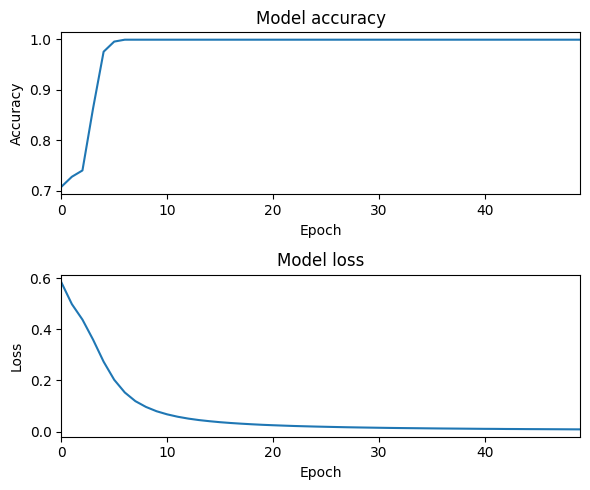

In [10]:
plt.rcParams["figure.figsize"] = (6,5)

fig, axs = plt.subplots(2)
axs[0].plot(history.history['accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlim([0, 49])

axs[1].plot(history.history['loss'])
axs[1].set_title('Model loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_xlim([0, 49])

plt.tight_layout()

plt.show()

In [11]:
model.layers[0].get_weights()

[array([[-2.8902612, -4.637316 ],
        [ 2.8168209,  4.5442705]], dtype=float32),
 array([ 2.5158188 , -0.23240054], dtype=float32)]

In [12]:
model.layers[1].get_weights()

[array([[-4.5764046],
        [ 6.4588556]], dtype=float32),
 array([4.3805575], dtype=float32)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


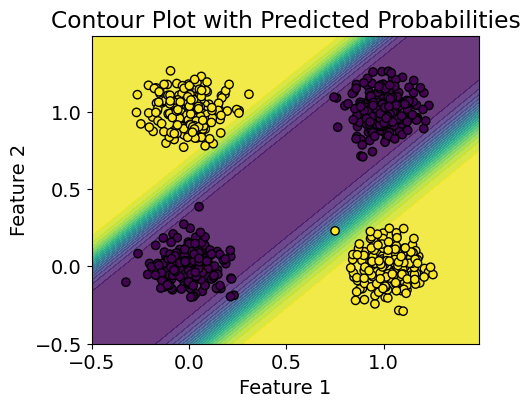

In [13]:
# visualize the classifier 

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})
# Create a mesh grid for the entire feature space
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), 
                     np.arange(y_min, y_max, step))

# Flatten the meshgrid and make predictions
mesh_input = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_input, batch_size=len(mesh_input))

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Create a contour plot
plt.contourf(xx, yy, predictions, cmap='viridis', levels=20, alpha=0.8)

# Scatter plot of the synthetic data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('Contour Plot with Predicted Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Q1: What happens if we don't use the "sigmoid" activation function?

- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/losses/probabilistic_losses/

When `from_logits=True`, the binary crossentropy loss function in Keras will internally apply the sigmoid activation function during the computation of the loss. 

In [14]:
# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='elu', input_dim=2))  

# Add the output layer
model.add(Dense(units=1)) # no 'sigmoid' activation 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X, y, epochs=50, batch_size=8)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 0.7686
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4594 - loss: 0.6517
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 0.5928
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 0.4937
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.3510
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.2147
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9998 - loss: 0.1319
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 0.0903
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0638
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0516
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0385
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


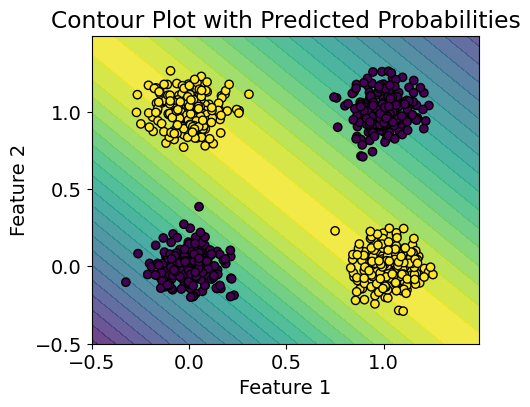

In [15]:
# visualize the classifier 

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})
# Create a mesh grid for the entire feature space
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), 
                     np.arange(y_min, y_max, step))

# Flatten the meshgrid and make predictions
mesh_input = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_input, batch_size=len(mesh_input))

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Create a contour plot
plt.contourf(xx, yy, predictions, cmap='viridis', levels=20, alpha=0.8)

# Scatter plot of the synthetic data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('Contour Plot with Predicted Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Q2: How to set aside validation data? 


In [16]:
# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='elu', input_dim=2))  

# Add the output layer
model.add(Dense(units=1)) # no 'sigmoid' activation 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5077 - loss: 0.6893 - val_accuracy: 0.4625 - val_loss: 0.6845
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - loss: 0.6845 - val_accuracy: 0.4625 - val_loss: 0.6818
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4992 - loss: 0.6786 - val_accuracy: 0.4625 - val_loss: 0.6752
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5259 - loss: 0.6706 - val_accuracy: 0.4625 - val_loss: 0.6681
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4924 - loss: 0.6599 - val_accuracy: 0.4625 - val_loss: 0.6595
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5068 - loss: 0.6504 - val_accuracy: 0.4625 - val_loss: 0.6446
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4854 - loss: 0.6331 - val_accuracy: 0.4625 - val_loss: 0.6294
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5129 - loss: 0.6095 - val_accuracy: 0.4625 - val_loss:

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

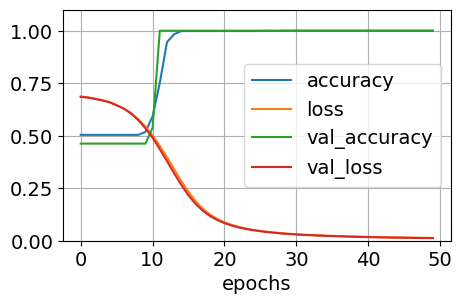

In [18]:
pd.DataFrame(history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.xlabel('epochs')
plt.show()

* In this example, we build and train a multilayer perceptron (MLP) regressor using Keras to predict disease progression based on the Diabetes dataset from Scikit-learn. 
* The model uses three hidden layers with ReLU activation functions and incorporates Dropout regularization to prevent overfitting. 
* The input features are first standardized to improve training stability and performance.
* We train the model using the Adam optimizer and mean squared error (MSE) loss, and evaluate its performance using the mean absolute error (MAE) and coefficient of determination (R² score). 
* A final scatter plot compares the model's predictions to the true target values, offering a visual assessment of the model's accuracy.



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


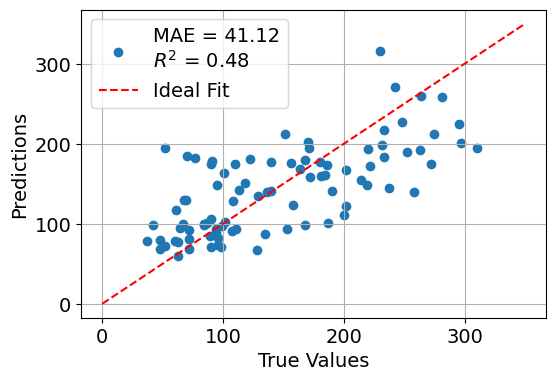

In [25]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an improved MLP model with dropout only
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.1,
    verbose=0  # Change to 1 to see training progress
)

# Predict on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot predictions vs. true values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, label=f"MAE = {mae:.2f}\n$R^2$ = {r2:.2f}")
plt.plot([0, 350], [0, 350], 'r--', label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
